### Internet privacy has gained widespread attention in recent years. To measure the degree to which people are concerned about hot-button issues like Internet privacy, social scientists conduct polls in which they interview a large number of people about the topic. In this assignment, we will analyze data from a July 2013 Pew Internet and American Life Project poll on Internet anonymity and privacy, which involved interviews across the United States.

In [2]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./AnonymityPoll.csv
./internet-privacy-poll-analysis copy.ipynb
./internet-privacy-poll-analysis.ipynb


In [3]:
data=pd.read_csv('AnonymityPoll.csv')

In [4]:
data.head()

,Internet.Use,Smartphone,Sex,Age,State,Region,Conservativeness,Info.On.Internet,Worry.About.Info,Privacy.Importance,Anonymity.Possible,Tried.Masking.Identity,Privacy.Laws.Effective
0,1.0,0.0,Male,62.0,Massachusetts,Northeast,4.0,0.0,1.0,100.000000,0.0,0.0,0.0
1,1.0,0.0,Male,45.0,South Carolina,South,1.0,1.0,0.0,0.000000,1.0,0.0,1.0
2,0.0,1.0,Female,70.0,New Jersey,Northeast,4.0,0.0,0.0,NaN,0.0,0.0,NaN
3,1.0,0.0,Male,70.0,Georgia,South,4.0,3.0,1.0,88.888889,1.0,0.0,0.0
4,0.0,NaN,Female,80.0,Georgia,South,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Internet.Use            1001 non-null   float64
 1   Smartphone              959 non-null    float64
 2   Sex                     1002 non-null   object 
 3   Age                     975 non-null    float64
 4   State                   1002 non-null   object 
 5   Region                  1002 non-null   object 
 6   Conservativeness        940 non-null    float64
 7   Info.On.Internet        792 non-null    float64
 8   Worry.About.Info        790 non-null    float64
 9   Privacy.Importance      787 non-null    float64
 10  Anonymity.Possible      753 non-null    float64
 11  Tried.Masking.Identity  784 non-null    float64
 12  Privacy.Laws.Effective  894 non-null    float64
dtypes: float64(10), object(3)
memory usage: 101.9+ KB


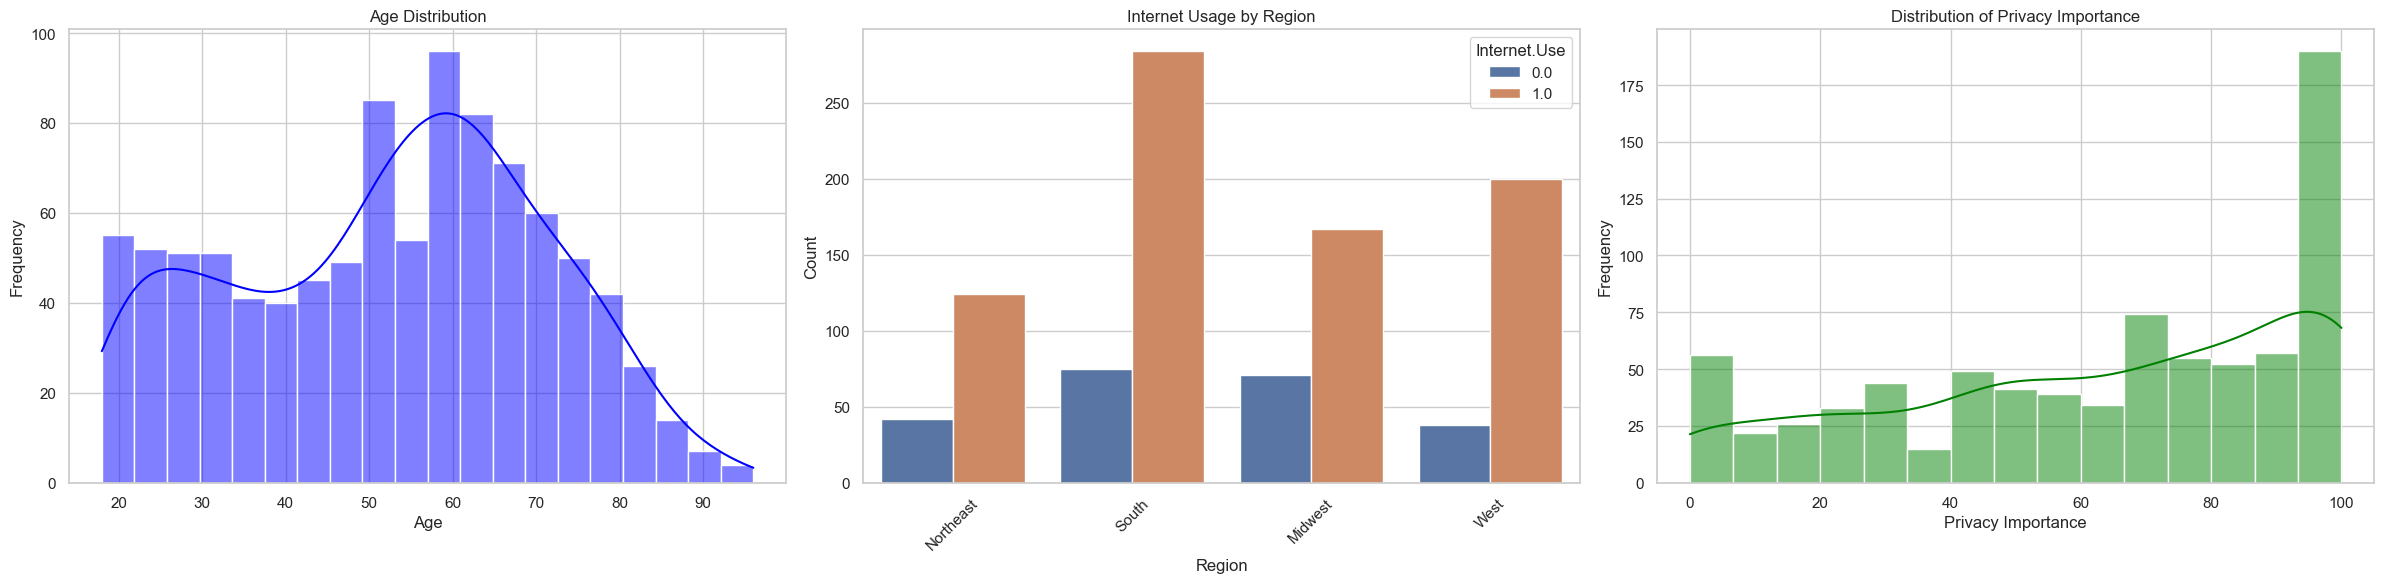

In [28]:
# Setting seaborn style for better aesthetics
sns.set(style="whitegrid")

# Combined Plot: Age Distribution, Internet Usage by Region, and Privacy Importance
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot 1: Distribution of Age
sns.histplot(data['Age'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot 2: Bar Plot of Internet Usage by Region
sns.countplot(data=data, x='Region', hue='Internet.Use', ax=axes[1])
axes[1].set_title('Internet Usage by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Privacy Importance Distribution
sns.histplot(data['Privacy.Importance'], bins=15, kde=True, color='green', ax=axes[2])
axes[2].set_title('Distribution of Privacy Importance')
axes[2].set_xlabel('Privacy Importance')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


How many people participated in the poll?

1002

In [6]:
data.Smartphone.value_counts()

Smartphone
1.0    487
0.0    472
Name: count, dtype: int64

In [7]:
data.Smartphone.isnull().value_counts()

Smartphone
False    959
True      43
Name: count, dtype: int64

**How many interviewees responded that they use a smartphone?**487

**How many interviewees responded that they don't use a smartphone?**472

**How many interviewees did not respond to the question, resulting in a missing value, or NA, in the summary() output?**43

In [8]:
pd.crosstab(data.Sex,columns=data.Region)

Region,Midwest,Northeast,South,West
Sex,,,,
Female,123,90,176,116
Male,116,76,183,122


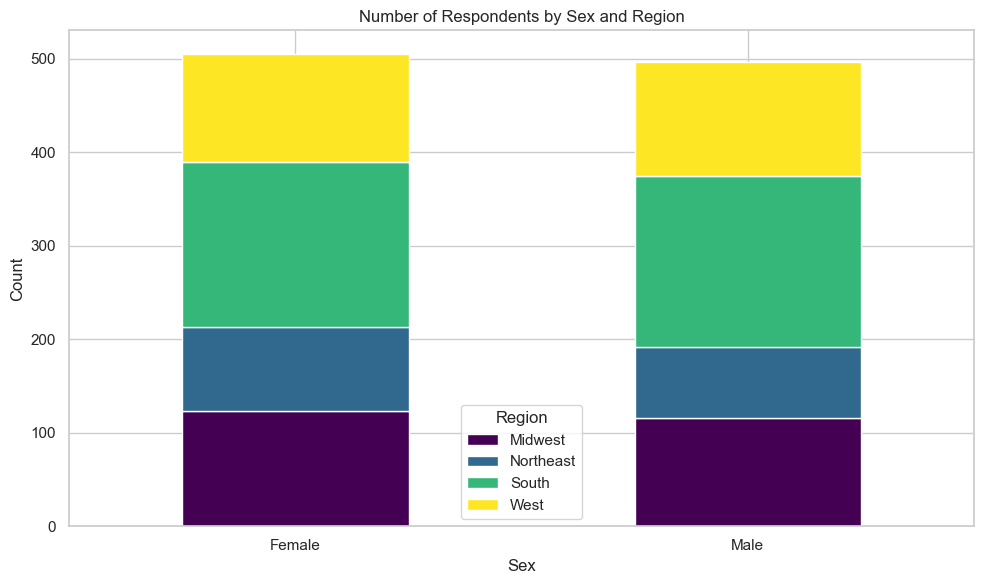

In [29]:
crosstab_data = pd.crosstab(data.Sex, columns=data.Region)
crosstab_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Number of Respondents by Sex and Region')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [38]:
pd.crosstab(data.State,columns=data.Region)

Region,Midwest,Northeast,South,West
State,,,,
Alabama,0,0,11,0
Arizona,0,0,0,24
Arkansas,0,0,10,0
California,0,0,0,103
Colorado,0,0,0,19
Connecticut,0,8,0,0
Delaware,0,0,6,0
District of Columbia,0,0,2,0
Florida,0,0,42,0


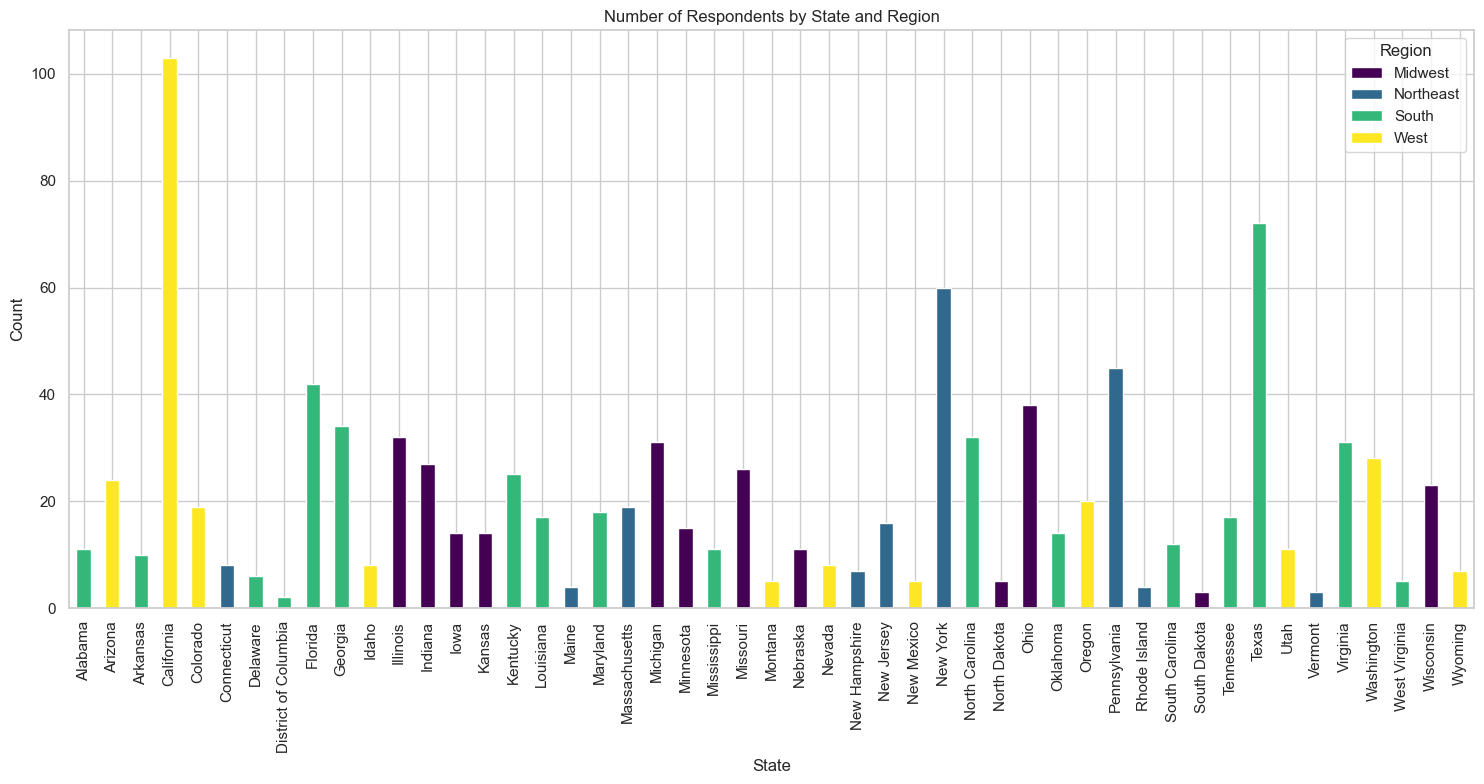

In [39]:
# Crosstab Data for Plot
crosstab_data = pd.crosstab(data['State'], data['Region'])

# Corrected Crosstab Plot
fig, ax = plt.subplots(figsize=(15, 8))
crosstab_data.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)
ax.set_title('Number of Respondents by State and Region')
ax.set_xlabel('State')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(title='Region')
plt.tight_layout()
plt.show()



Which of the following are states in the Midwest census region? (Select all that apply.)
Kansas Ohio Missouri



Which was the state in the South census region with the largest number of interviewees?
Texas




In [40]:
pd.crosstab(data['Internet.Use'],columns=data.Smartphone)

Smartphone,0.0,1.0
Internet.Use,,
0.0,186,17
1.0,285,470


How many interviewees reported not having used the Internet and not having used a smartphone?
186
How many interviewees reported having used the Internet and having used a smartphone?470
How many interviewees reported having used the Internet but not having used a smartphone?285
How many interviewees reported having used a smartphone but not having used the Internet?17








In [41]:
data.isnull().sum()

Internet.Use                1
Smartphone                 43
Sex                         0
Age                        27
State                       0
Region                      0
Conservativeness           62
Info.On.Internet          210
Worry.About.Info          212
Privacy.Importance        215
Anonymity.Possible        249
Tried.Masking.Identity    218
Privacy.Laws.Effective    108
dtype: int64

How many interviewees have a missing value for their Internet use?1
How many interviewees have a missing value for their smartphone use?43





In [42]:
limited = data[(data['Internet.Use'] == 1) | data.Smartphone == 1]


In [43]:
limited.head()

,Internet.Use,Smartphone,Sex,Age,State,Region,Conservativeness,Info.On.Internet,Worry.About.Info,Privacy.Importance,Anonymity.Possible,Tried.Masking.Identity,Privacy.Laws.Effective
0,1.0,0.0,Male,62.0,Massachusetts,Northeast,4.0,0.0,1.0,100.000000,0.0,0.0,0.0
1,1.0,0.0,Male,45.0,South Carolina,South,1.0,1.0,0.0,0.000000,1.0,0.0,1.0
2,0.0,1.0,Female,70.0,New Jersey,Northeast,4.0,0.0,0.0,NaN,0.0,0.0,NaN
3,1.0,0.0,Male,70.0,Georgia,South,4.0,3.0,1.0,88.888889,1.0,0.0,0.0
5,1.0,1.0,Male,49.0,Tennessee,South,4.0,6.0,0.0,88.888889,1.0,1.0,0.0


In [44]:
limited.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 0 to 1001
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Internet.Use            792 non-null    float64
 1   Smartphone              772 non-null    float64
 2   Sex                     792 non-null    object 
 3   Age                     770 non-null    float64
 4   State                   792 non-null    object 
 5   Region                  792 non-null    object 
 6   Conservativeness        747 non-null    float64
 7   Info.On.Internet        792 non-null    float64
 8   Worry.About.Info        790 non-null    float64
 9   Privacy.Importance      787 non-null    float64
 10  Anonymity.Possible      753 non-null    float64
 11  Tried.Masking.Identity  784 non-null    float64
 12  Privacy.Laws.Effective  727 non-null    float64
dtypes: float64(10), object(3)
memory usage: 86.6+ KB


In [45]:
limited.isnull().sum()

Internet.Use               0
Smartphone                20
Sex                        0
Age                       22
State                      0
Region                     0
Conservativeness          45
Info.On.Internet           0
Worry.About.Info           2
Privacy.Importance         5
Anonymity.Possible        39
Tried.Masking.Identity     8
Privacy.Laws.Effective    65
dtype: int64

How many interviewees are in the new data frame?

792

Which variables have missing values in the limited data frame? (Select all that apply.)
Smartphone                
Age
Cons
Worry
privacy imp
Anonymity
Tried
Privacy



In [46]:
data['Info.On.Internet'].mean()

3.7954545454545454

What is the average number of pieces of personal information on the Internet, according to the Info.On.Internet variable?

3.795

In [47]:
data['Info.On.Internet'].value_counts()

Info.On.Internet
0.0     105
4.0     104
3.0     101
2.0      95
5.0      94
1.0      84
6.0      67
7.0      63
8.0      40
9.0      18
10.0     13
11.0      8
Name: count, dtype: int64

**How many interviewees reported a value of 0 for Info.On.Internet?105**
**How many interviewees reported the maximum value of 11 for Info.On.Internet?8**

What proportion of interviewees who answered the Worry.About.Info question worry
about how much information is available about them on the Internet? 0.4886

In [48]:
data['Worry.About.Info'].value_counts()

Worry.About.Info
0.0    404
1.0    386
Name: count, dtype: int64

In [49]:
(data['Worry.About.Info'].value_counts()[1])/data['Worry.About.Info'].count()

0.48860759493670886

In [50]:
(data['Anonymity.Possible'].value_counts()[1])/data['Anonymity.Possible'].count()
 

0.3691899070385126

What proportion of interviewees who answered the Anonymity.Possible question think it is possible to be completely anonymous on the Internet?0.3692

In [51]:
(data['Tried.Masking.Identity'].value_counts()[1])/data['Tried.Masking.Identity'].count()


0.16326530612244897

What proportion of interviewees who answered the Tried.Masking.Identity question have tried masking their identity on the Internet?

0.1632653

In [52]:
(limited['Privacy.Laws.Effective'].value_counts()[1])/limited['Privacy.Laws.Effective'].count()


0.2558459422283356

What proportion of interviewees who answered the Privacy.Laws.Effective question find United States privacy laws effective?
0.2558


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/wm/897tc_g50rdd2pn75nqhjpbr0000gn/T/ipykernel_33809/2627699422.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age, kde=True, bins=40)


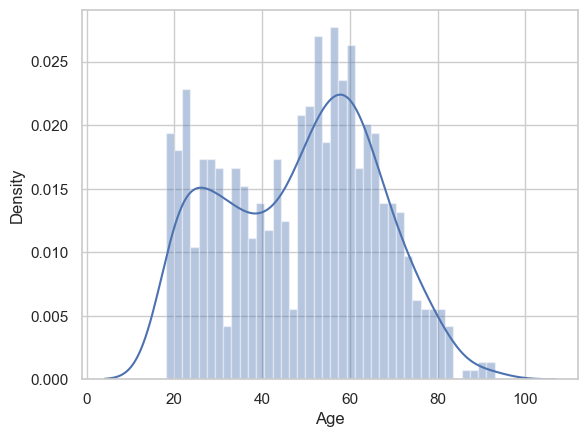

In [54]:
age = limited.Age[~limited.Age.isnull()]  # remove the nulls so that I can draw histogram
sns.distplot(age, kde=True, bins=40)
plt.show()

Often, we are interested in whether certain characteristics of interviewees (

e.g. their age or political opinions) affect their opinions on the topic of the

poll (in this case, opinions on privacy). In this section, we will investigate the 

relationship between the characteristics Age and Smartphone and outcome variables 

Info.On.Internet and Tried.Masking.Identity, again using the limited data frame we 

built in an earlier section of this problem.

Build a histogram of the age of interviewees. What is the best represented age group in the population?

60

In [55]:
limited[limited.Smartphone == 0]['Info.On.Internet'].describe()

count    285.000000
mean       2.922807
std        2.449707
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       11.000000
Name: Info.On.Internet, dtype: float64

In [56]:
# What proportion of smartphone users who answered the Tried.Masking.Identity question have tried
#  masking their identity when using the Internet?


maskers = limited[ (limited.Smartphone == 1) & (limited['Tried.Masking.Identity'] == 1)].shape[0]  # no. of obs
non_maskers = len(limited[ (limited.Smartphone == 1) & (limited['Tried.Masking.Identity'] == 0)] )

print(maskers / (maskers + non_maskers))



0.19254658385093168


In [57]:
xx = limited[ (limited.Smartphone == 0) & (limited['Tried.Masking.Identity'] == 1) ].shape[0]
yy = limited[ (limited.Smartphone == 0) & (limited['Tried.Masking.Identity'] == 0)].shape[0]

print(xx / (xx + yy))

0.11743772241992882
